In [104]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#**Modelo de Regressão**

In [105]:
# Carregar os dados
file_name = '/content/relatorios_para_IOT.csv'
df = pd.read_csv(file_name, encoding='ISO-8859-1', delimiter=';')

In [106]:
# Pré-processamento
# Substituir valores de 'urgencia' por números: Baixa=1, Média=2, Alta=3
# Transforma a variável "Comorbidades" (onde 'nenhuma' = 0, outros tipos = 1)
df['Urgencia'] = df['Urgencia'].map({'Baixa': 1, 'Média': 2, 'Alta': 3})
df['Comorbidades'] = df['Comorbidades'].apply(lambda x: 1 if x != 'Nenhuma' else 0)

In [107]:
# Criar uma variável de necessidade de consulta urgente
# A ponderação dos fatores pode ser ajustada de acordo com a sua necessidade
df['Necessidade_Urgente'] = (
    df['Idade'] * 1 +
    df['Gravidade do Caso'] * 2 +
    df['Urgencia'] * 1 +
    df['Comorbidades'] * 2 +
    df['Numero de Consultas Anteriores'] * 0.5  # Novo fator: histórico de consultas
)

In [108]:
# Selecionar variáveis
X = df[['Idade', 'Gravidade do Caso', 'Comorbidades', 'Numero de Consultas Anteriores']]
y = df['Necessidade_Urgente']

In [109]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
# Treinando o modelo de Random Forest para regressão
# Previsão nos dados de teste
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
# Avaliação do modelo com métricas de regressão
print("🔍 Métricas de Regressão:")
print(f"Erro quadrático médio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de determinação (R²): {r2_score(y_test, y_pred):.2f}")


🔍 Métricas de Regressão:
Erro quadrático médio (MSE): 3.09
Coeficiente de determinação (R²): 0.97


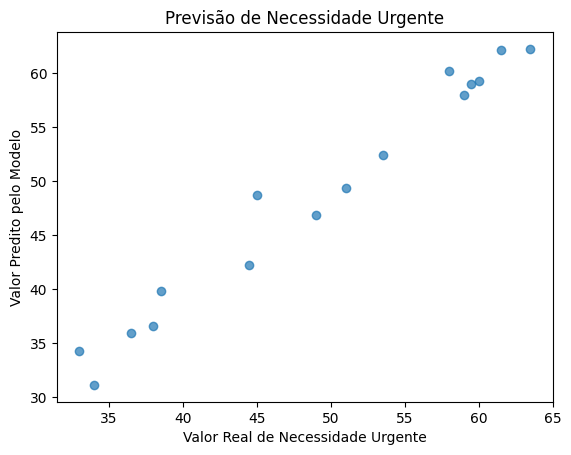

In [112]:
# Gráfico de dispersão
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valor Real de Necessidade Urgente")
plt.ylabel("Valor Predito pelo Modelo")
plt.title("Previsão de Necessidade Urgente")
plt.show()

In [113]:
# Relatório interpretativo das predições
print("\n📋 Análise dos Pacientes (Amostra):")
for i in range(min(len(y_pred), 10)):
    status = "🔴 Alta Prioridade" if y_pred[i] > 50 else "🟡 Média/Baixa"
    print(f"Paciente {i+1}: Pontuação IA = {y_pred[i]:.2f} → {status}")



📋 Análise dos Pacientes (Amostra):
Paciente 1: Pontuação IA = 59.04 → 🔴 Alta Prioridade
Paciente 2: Pontuação IA = 35.93 → 🟡 Média/Baixa
Paciente 3: Pontuação IA = 31.14 → 🟡 Média/Baixa
Paciente 4: Pontuação IA = 36.64 → 🟡 Média/Baixa
Paciente 5: Pontuação IA = 48.72 → 🟡 Média/Baixa
Paciente 6: Pontuação IA = 52.45 → 🔴 Alta Prioridade
Paciente 7: Pontuação IA = 46.88 → 🟡 Média/Baixa
Paciente 8: Pontuação IA = 62.25 → 🔴 Alta Prioridade
Paciente 9: Pontuação IA = 60.16 → 🔴 Alta Prioridade
Paciente 10: Pontuação IA = 58.03 → 🔴 Alta Prioridade


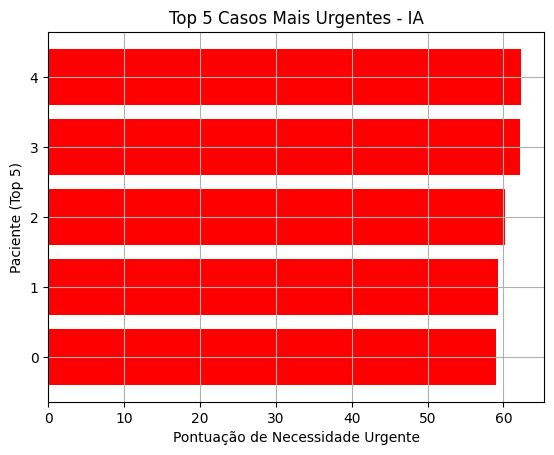

In [114]:
# Top 5 casos mais urgentes
top_indices = np.argsort(y_pred)[-5:]
top_scores = y_pred[top_indices]

plt.barh(range(5), top_scores, color='red')
plt.xlabel("Pontuação de Necessidade Urgente")
plt.ylabel("Paciente (Top 5)")
plt.title("Top 5 Casos Mais Urgentes - IA")
plt.grid(True)
plt.show()

# **Modelo de Classificação**

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [116]:
# Carregar os dados
file_name = '/content/relatorios_para_IOT.csv'
df = pd.read_csv(file_name, encoding='ISO-8859-1', delimiter=';')

In [117]:
# Pré-processamento
# Substituir valores de 'urgencia' por números: Baixa=1, Média=2, Alta=3
# Transformar 'Comorbidades' em categorias binárias: Nenhuma = 0, Outros = 1
df['Urgencia'] = df['Urgencia'].map({'Baixa': 1, 'Média': 2, 'Alta': 3})
df['Comorbidades'] = df['Comorbidades'].apply(lambda x: 0 if x == 'Nenhuma' else 1)


In [118]:
# Função para definir necessidade da consulta com base na idade
def necessidade_consulta(idade):
    if 15 <= idade <= 49:
        return 1  # Necessidade baixa
    elif 1 <= idade < 15:
        return 2  # Necessidade média
    elif idade >= 60:
        return 3  # Necessidade alta
    else:
        return 2  # Caso não se encaixe, você pode definir como 2 (média)

# Transformando a coluna Idade com base na função necessidade consulta
df['Idade'] = df['Idade'].apply(necessidade_consulta)

In [119]:
# Criar uma variável de prioridade de atendimento
# A ponderação dos fatores pode ser ajustada de acordo com a sua necessidade
df['Necessidade_Consulta'] = (
    df['Idade'] * 1 +
    df['Gravidade do Caso'] * 2 +
    df['Urgencia'] * 1 +
    df['Comorbidades'] * 3 +
    df['Numero de Consultas Anteriores'] * 0.5
)

In [120]:
# Converter score em categoria: 1 = baixa, 2 = média, 3 = alta
df['Necessidade_Consulta'] = df['Necessidade_Consulta'].apply(
    lambda x: 1 if x <= 8 else (2 if x <= 10 else 3)
)

In [121]:
# Seleção das variáveis
# Todas codificadas numericamente
# Variável dependente (target)
X_forr = df[['Gravidade do Caso', 'Urgencia', 'Comorbidades', 'Idade', 'Numero de Consultas Anteriores']]
y_forr = df['Necessidade_Consulta']

In [122]:
# Dividir os dados em treino e teste
X_train_for, X_test_for, y_train_for, y_test_for = train_test_split(X_forr, y_forr, test_size=0.3, random_state=42)


In [123]:
# Criar e treinar o modelo (exemplo com RandomForest)
# Previsão nos dados de teste
model_forr = RandomForestClassifier(random_state=42)
model_forr.fit(X_train_for, y_train_for)
y_pred_for = model_forr.predict(X_test_for)

In [124]:
# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test_for, y_pred_for))
print("📉 Matriz de Confusão:")
print(confusion_matrix(y_test_for, y_pred_for))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.89      0.80      0.84        10
           3       0.91      0.91      0.91        11

    accuracy                           0.88        24
   macro avg       0.85      0.90      0.87        24
weighted avg       0.88      0.88      0.87        24

📉 Matriz de Confusão:
[[ 3  0  0]
 [ 1  8  1]
 [ 0  1 10]]
